In [1]:
#Importing nltk for doing Sentiment Analysis
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
#Importing DataSet
df=pd.read_csv("c:\\amazonReviews.csv")

In [5]:
#Describing Entire Data
df.describe()

,Unnamed: 0,overall,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
count,4915.000000,4915.000000,4915.000000,4915.000000,4915.000000,4915.000000,4915.000000,4915.000000,4915.000000
mean,2457.000000,4.587589,437.367040,1.311089,0.210376,1.521465,1.100712,0.075468,0.020053
std,1418.982617,0.996845,209.439871,41.619161,4.023296,44.123095,39.367949,0.256062,0.077187
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,-130.000000,0.000000,0.000000
25%,1228.500000,5.000000,281.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2457.000000,5.000000,431.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3685.500000,5.000000,601.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,4914.000000,5.000000,1064.000000,1952.000000,183.000000,2020.000000,1884.000000,1.000000,0.957544


In [6]:
#Getting Info including Column wise non null counts and Data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4915 entries, 0 to 4914
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            4915 non-null   int64  
 1   reviewerName          4914 non-null   object 
 2   overall               4915 non-null   float64
 3   reviewText            4914 non-null   object 
 4   reviewTime            4915 non-null   object 
 5   day_diff              4915 non-null   int64  
 6   helpful_yes           4915 non-null   int64  
 7   helpful_no            4915 non-null   int64  
 8   total_vote            4915 non-null   int64  
 9   score_pos_neg_diff    4915 non-null   int64  
 10  score_average_rating  4915 non-null   float64
 11  wilson_lower_bound    4915 non-null   float64
dtypes: float64(3), int64(6), object(3)
memory usage: 460.9+ KB


In [7]:
df.head()

,Unnamed: 0,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
0,0,NaN,4.0,No issues.,2014-07-23,138,0,0,0,0,0.0,0.0
1,1,0mie,5.0,"Purchased this for my device, it worked as adv...",2013-10-25,409,0,0,0,0,0.0,0.0
2,2,1K3,4.0,it works as expected. I should have sprung for...,2012-12-23,715,0,0,0,0,0.0,0.0
3,3,1m2,5.0,This think has worked out great.Had a diff. br...,2013-11-21,382,0,0,0,0,0.0,0.0
4,4,2&amp;1/2Men,5.0,"Bought it with Retail Packaging, arrived legit...",2013-07-13,513,0,0,0,0,0.0,0.0


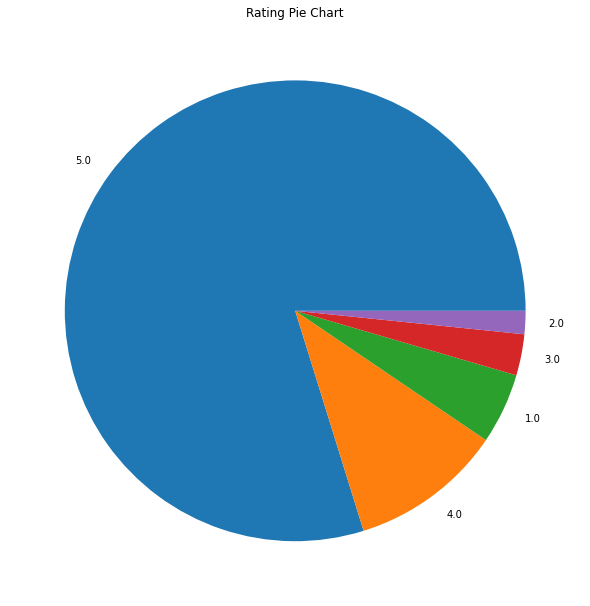

In [8]:
#Visualising the Overall Rating via Pie Chart
fig=plt.figure()
ax=fig.add_axes([1,1,2,2])
ax.set_title("Rating Pie Chart")
x=df["overall"].value_counts()
y=x.index
z=x.values
ax.pie(z,labels=y)
plt.show()

In [9]:
#Dropping NA values
df=df.dropna()

In [10]:
#Sentiment Analysis
sid=SentimentIntensityAnalyzer()

In [11]:
df["Positive"]=[sid.polarity_scores(i)["pos"] for i in df["reviewText"]]

In [12]:
df["Negative"]=[sid.polarity_scores(i)["neg"] for i in df["reviewText"]]
df["Neutral"]=[sid.polarity_scores(i)["neu"] for i in df["reviewText"]]

In [13]:
df.head()

,Unnamed: 0,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound,Positive,Negative,Neutral
1,1,0mie,5.0,"Purchased this for my device, it worked as adv...",2013-10-25,409,0,0,0,0,0.0,0.0,0.000,0.075,0.925
2,2,1K3,4.0,it works as expected. I should have sprung for...,2012-12-23,715,0,0,0,0,0.0,0.0,0.000,0.077,0.923
3,3,1m2,5.0,This think has worked out great.Had a diff. br...,2013-11-21,382,0,0,0,0,0.0,0.0,0.091,0.000,0.909
4,4,2&amp;1/2Men,5.0,"Bought it with Retail Packaging, arrived legit...",2013-07-13,513,0,0,0,0,0.0,0.0,0.127,0.038,0.835
5,5,2Cents!,5.0,It's mini storage. It doesn't do anything els...,2013-04-29,588,0,0,0,0,0.0,0.0,0.000,0.000,1.000


In [14]:
#Getting Total of Responses
a=sum(df["Positive"])
b=sum(df["Negative"])
c=sum(df["Neutral"])

In [15]:
#Finding out the overall response
if a>b and a>c:
    print("The Overall Review is Positive with Value:",a)
elif b>a and b>c:
    print("The Overall Review is Negative with Value:",b)
else:
    print("The Overall Review is Neutral with Value:",c)

The Overall Review is Neutral with Value: 3927.775999999992


In [16]:
#Printing Response wise total Score
print("Positive Score-",a)
print("Negative Score-",b)
print("Neutral Score-",c)

Positive Score- 765.5469999999979
Negative Score- 219.70400000000006
Neutral Score- 3927.775999999992
